From https://www.kaggle.com/datasets/vinven7/comprehensive-database-of-minerals/

About this file

This dataset is the collection of 3112 minerals, their chemical compositions,
crystal structure, physical and optical properties. The properties that are
included in this database are the Crystal structure, Mohs Hardness, Refractive
Index, Optical axes, Optical Dispersion, Molar Volume, Molar, Mass, Specific
Gravity, and Calculated Density.

Introduction

The term ‘dielectric’ is applied to a class of materials - usually solids - that
are poor conductors of electricity. Dielectrics are of significant technological
and industrial importance, being essential functional components of almost all
electronic devices. For most of these applications, they are required to be
mechanically tough and thermally robust. The defining physical attribute of a
dielectric is electric polarizability which is the tendency for charges to be
non-uniformly distributed across a chemical bond. Most dielectrics contain
dipoles due to their ionic bonds or covalent bonds with strong ionic nature. At
a macroscopic scale, this implies that an external electric field can interact
with these charges and result in various optical and electric phenomena.

**Provenance of Data. **

The names, hardness, optical axes, specific gravity, and refractive index have
been scraped from Wikipedia: https://en.wikipedia.org/wiki/List_of_minerals

The crystallographic information has been scraped from the structure database at
The American Mineralogist Crystal Structure Database at
http://rruff.geo.arizona.edu/AMS/amcsd.php

Compared to other properties, dispersion of minerals has been hard to find.
Dispersion values of 60 minerals found at: http://gemologyproject.com/wiki.

The chemical formula, molar mass, molar volume, and calculated density are
available for all minerals. The availability of other properties vary.

**Chemical Formula **

The chemical formula has been parsed so that the number of each element has been
separated tabulated. For example, the mineral Quartz has the formula 'SiO2' - so
that the corresponding entry for the column 'Silicon' is 1 and the entry for
'Oxygen' is 2. The entries for all the other elements are 0.

In this way, the chemical formula for each mineral is converted into a vector
where each column correponds to an element in the periodic table and the value
corresponds to the number of atoms of the element in a formula unit of the
mineral.

In addition to the pure elements, ionic species such as carbonate, phosphate,
nitrate, cyanide, hydrated water, etc are also counted separately.

Molar Mass

The molar mass of the mineral is calculated by adding together the mass of each
atom in a mole of the mineral.

Molar mass = Summation( no of atoms * mass of each atom)

**Molar Volume **

The molar volume of the mineral is calculated by adding together the volume of
each atom in a mole of the mineral.

Molar volume = Summation( no of atoms * volume of each atom)

**Refractive Index **

The refractive index of the mineral is defined as the ratio of the speed of
light in the mineral to the speed of light in free space.

This is a function of the frequency of light. The RI of blue light is not the
same as the RI of red light in the same mineral. This variation is measured by
'dispersion'.

Mohs Hardness

Mohs hardness is a qualitative measure for the hardness of a mineral that is
frequently used by the geologist. Diamond (hardest mineral) is given the highest
value of 10 and talc (softest mineral) is given the value of 1. A mineral that
can scratch a second mineral has a higher Mohs hardness. In this way, all the
minerals can be ranked on a relative scale of hardness. It is not exactly clear
what physical parameter is represented by the Mohs Hardness. Several absolute
scales for hardness such as toughness, yield strength, etc. are known from the
mechanics of materials, however, none of them seem to correspond exactly to Mohs
Hardness. However, this remains a very intuitive way to understand the physical
property of a material.

1. Predicting the Optical Axes from other physical properties of crystal

Optical Axes: 1-Anisotropic, 2-Isotropic, 3-Uniaxial, 4-Biaxial

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

2. Acquire data/clean data

In [46]:
df = pd.read_csv('Minerals_Database.csv')

# basic touching up
df.columns = df.columns.str.replace(' ', '_')
df.index = df.Name
df.index.name = ''
df.drop(['Name', 'Unnamed:_0'], axis=1, inplace = True)

# convert to int
properties_int_value = ['Crystal_Structure', 'Diaphaneity', 'Optical']
for s in properties_int_value:
    df[s] = df[s].astype(int)

df

,Crystal_Structure,Mohs_Hardness,Diaphaneity,Specific_Gravity,Optical,Refractive_Index,Dispersion,Hydrogen,Helium,Lithium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated_Water,count,Molar_Mass,Molar_Volume,Calculated_Density
,,,,,,,,,,,,,,,,,,,,,
Abenakiite-(Ce),5,4.50,0,3.240,3,1.580,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
Abernathyite,4,2.75,3,3.446,3,1.592,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
Abhurite,5,2.00,3,4.420,3,2.085,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
Abswurmbachite,0,0.00,0,0.000,0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
Actinolite,2,5.50,2,1.050,4,1.634,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoltaiite,0,0.00,0,0.000,0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,677.090039,0.067308,8.349
Zugshunstite-(Ce),0,0.00,0,0.000,0,0.000,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1005.674169,0.280205,2.979
Zvyaginite,0,0.00,0,0.000,0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,38.0,1037.626464,0.179472,4.799


In [47]:
# only use crystals with no radioactive elements

radioactive_elements = ['Technetium', 'Promethium', 'Polonium', 'Astatine', 'Radon', 'Francium', 'Radium', 'Actinium', 'Thorium', 'Protactinium', 'Uranium', 'Neptunium', 'Plutonium', 'Americium', 'Curium', 'Berkelium', 'Californium', 'Einsteinium', 'Fermium', 'Mendelevium', 'Nobelium', 'Lawrencium', 'Rutherfordium', 'Dubnium', 'Seaborgium', 'Bohrium', 'Hassium', 'Meitnerium', 'Darmstadtium', 'Roentgenium', 'Copernicium', 'Nihonium', 'Flerovium', 'Moscovium', 'Livermorium', 'Tennessine', 'Oganesson']

# add new column, sum of num of radioactive elements
df["tot_radio"] = df[radioactive_elements].sum(axis = 1)

# remove material that have nonzero amount of radioactive elements
df = df.drop(df[df.tot_radio > 0].index, axis = 0)

In [48]:
# material properties, rearranged so discrete variables in front
# Dispersion very few, 34 entries (originally 60 entries), remove now
mtl_prop = ['Crystal_Structure', 'Diaphaneity', 'Optical', 'Mohs_Hardness', 'Specific_Gravity', 'Refractive_Index']
df = df[mtl_prop]

In [49]:
# remove entries that have unknown values (indicated by 0)
# keep dataframe for later use
dff = df.copy()
for s in mtl_prop:
    df = df[df[s] > 0]

3. Some exploratory data analysis

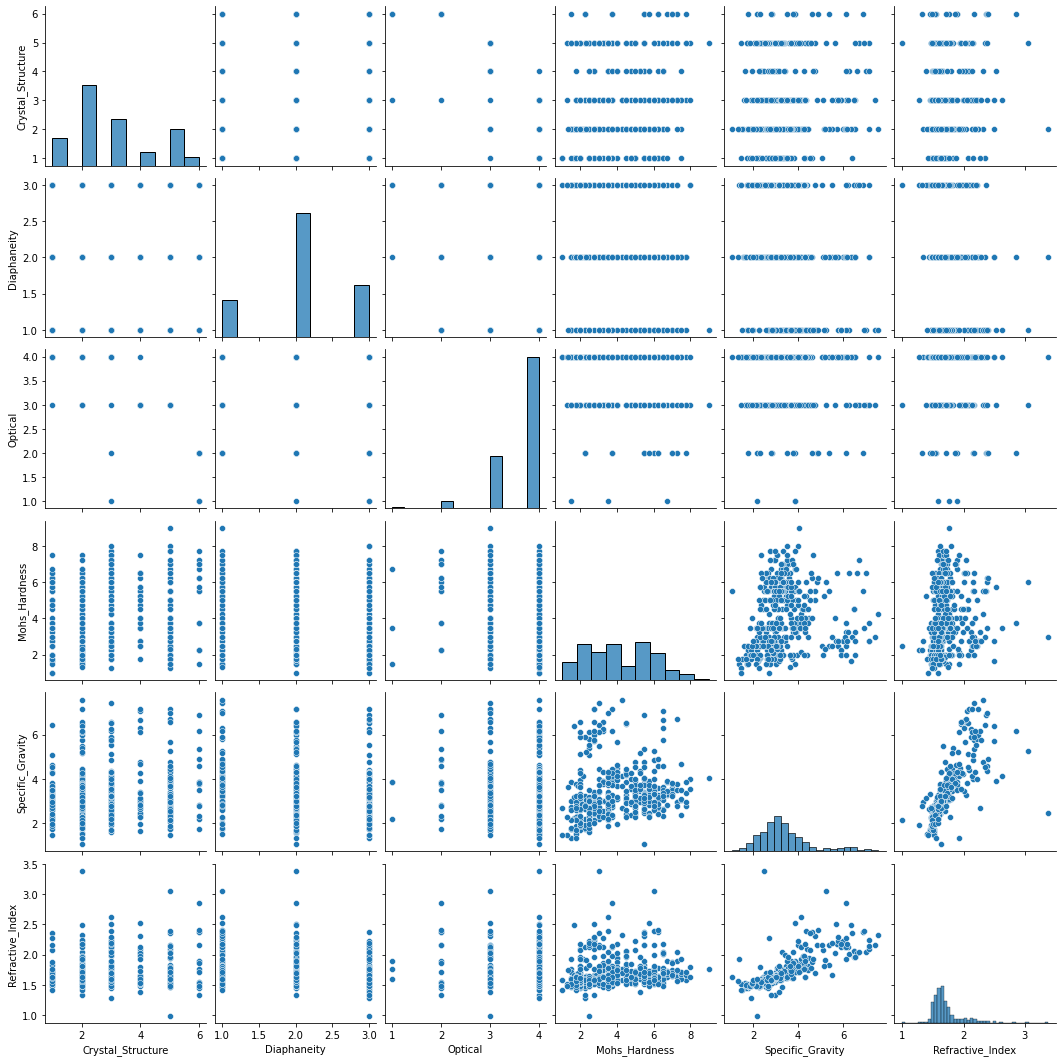

In [8]:
sns.pairplot(df)

4. Model the Data
We will use KNN and RandomForest

In [9]:
X_vars = mtl_prop[0:2] + mtl_prop[3:6]
Y_var = mtl_prop[2]
X, Y = df[X_vars], df[Y_var]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, 
                                                    test_size = 0.35, shuffle=True)

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn

knn_model = knn(n_neighbors=7)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


print(accuracy_score(knn_model.predict(X_test), y_test))


0.9375


In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print(accuracy_score(y_pred, y_test))

0.9652777777777778


In [13]:
# We attempt to predict Optical Axes with fewer variables

def get_accuracy(X_vars, Y_var, df=df):
    X, Y = df[X_vars], df[Y_var]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, 
                                                    test_size = 0.35, shuffle=True)

    knn_model = knn(n_neighbors=7)
    knn_model.fit(X_train, y_train)
    
    knn_acc = accuracy_score(knn_model.predict(X_test), y_test)
    
    forest = RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)
    forest.fit(X_train, y_train)
    forest_acc = accuracy_score(forest.predict(X_test), y_test)
    
    return (knn_acc, forest_acc)


In [14]:
Y_var = 'Optical'

# get all non-empty subsets of other properties
inds = [[]]
for i in [1,3,4,5,0]:
    inds = inds + [l + [i] for l in inds]
inds = inds[1:]
X_vars_ls = [[df.columns[i] for i in l] for l in inds]

all_accuracies = [get_accuracy(X_vars, Y_var) for X_vars in X_vars_ls]

In [29]:
# print results
df_acc = pd.DataFrame()
df_acc['inds'] = inds
df_acc['KNN'] = [v[0] for v in all_accuracies]
df_acc['forest'] = [v[1] for v in all_accuracies]

for i in [0,1,3,4,5]:
    df_acc[mtl_prop[i]] = [(i in v) for v in inds]

df_acc

ValueError: Length of values (31) does not match length of index (15)

In [16]:
df_acc

,inds,KNN,forest,Crystal_Structure,Diaphaneity,Mohs_Hardness,Specific_Gravity,Refractive_Index
0,[1],0.729167,0.729167,False,True,False,False,False
1,[3],0.638889,0.680556,False,False,True,False,False
2,"[1, 3]",0.659722,0.666667,False,True,True,False,False
3,[4],0.694444,0.604167,False,False,False,True,False
4,"[1, 4]",0.694444,0.625000,False,True,False,True,False
5,"[3, 4]",0.673611,0.659722,False,False,True,True,False
6,"[1, 3, 4]",0.680556,0.645833,False,True,True,True,False
7,[5],0.687500,0.625000,False,False,False,False,True
8,"[1, 5]",0.673611,0.631944,False,True,False,False,True
9,"[3, 5]",0.715278,0.631944,False,False,True,False,True


Perhaps unsurprisingly to experts, Crystal Structure plays an outsize role in predicting Optical Axes. It is better to predict Optical Axes with only Crystal Structure than to incorporate other variables.
Let us investigate if this holds even if we use all minerals with Crystal Structure and Optical Axes data present

In [17]:
import matplotlib.pyplot as plt

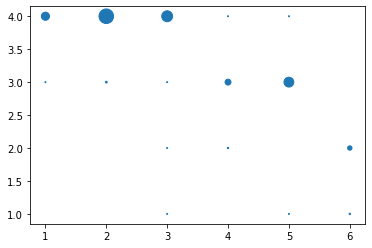

In [53]:
dff = dff[['Crystal_Structure','Optical']]
dff = dff[(dff.Crystal_Structure > 0) & (dff.Optical > 0)]
compressed = dff.value_counts()
xx = [v[0] for v in compressed.index]
yy = [v[1] for v in compressed.index]
plt.scatter(x=xx, y=yy, s=compressed)

In [54]:
# manually assigning prediction
manual_predict = [-1, 4, 4, 4, 3, 3, 2]

#accuracy_score(forest.predict(X_test), y_test)
Y_pred = dff.Crystal_Structure.map(lambda x : manual_predict[x] if x > 0 else 0)
Y = dff.Optical

accuracy_score(Y_pred,Y)

0.9751332149200711

Conclusion: Optical Axes can be predicted by Crystal Structure with >97% accuracy.